In [37]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
%matplotlib inline

In [3]:
db = json.load(open('foods-2011-10-03.json'))
len(db)

6636

In [4]:
db[0].keys()

[u'portions',
 u'description',
 u'tags',
 u'nutrients',
 u'group',
 u'id',
 u'manufacturer']

In [5]:
nutrients = pd.DataFrame(db[0]['nutrients'])
nutrients[:3]

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06


In [6]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = pd.DataFrame(db, columns=info_keys)
info.tail()

,description,group,id,manufacturer
6631,"Bologna, beef, low fat",Sausages and Luncheon Meats,42161,
6632,"Turkey and pork sausage, fresh, bulk, patty or...",Sausages and Luncheon Meats,42173,
6633,"Babyfood, juice, pear",Baby Foods,43408,None
6634,"Babyfood, dessert, banana yogurt, strained",Baby Foods,43539,None
6635,"Babyfood, banana no tapioca, strained",Baby Foods,43546,None


In [7]:
pd.value_counts(info.group)

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Beverages                            278
Soups, Sauces, and Gravies           275
Finfish and Shellfish Products       255
Baby Foods                           209
Cereal Grains and Pasta              183
Ethnic Foods                         165
Snacks                               162
Nut and Seed Products                128
Poultry Products                     116
Sausages and Luncheon Meats          111
Dairy and Egg Products               107
Fats and Oils                         97
Meals, Entrees, and Sidedishes        57
Restaurant Foods                      51
Spices and Herbs

In [9]:
nutrients = []

for rec in db:
    fnuts = pd.DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id'] # 给nutrients增加一个id列，方便后面连接
    nutrients.append(fnuts)
    
nutrients = pd.concat(nutrients, ignore_index=True)
nutrients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389355 entries, 0 to 389354
Data columns (total 5 columns):
description    389355 non-null object
group          389355 non-null object
units          389355 non-null object
value          389355 non-null float64
id             389355 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 10.4+ MB


In [10]:
nutrients.duplicated().sum()

14179

In [12]:
nutrients = nutrients.drop_duplicates()
nutrients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 389354
Data columns (total 5 columns):
description    375176 non-null object
group          375176 non-null object
units          375176 non-null object
value          375176 non-null float64
id             375176 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 12.9+ MB


In [16]:
# 处理info 的col name
col_mapping = {'description': 'food',
               'group': 'fgroup'} # db 和 nutrients都有group和description，区别开
info = info.rename(columns=col_mapping, copy=False) # info 处理后的db
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
food            6636 non-null object
fgroup          6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 129.6+ KB


In [19]:
# 处理nutrients 的col name
col_mapping = {'description': 'nutrient',
              'group': 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 389354
Data columns (total 5 columns):
nutrient    375176 non-null object
nutgroup    375176 non-null object
units       375176 non-null object
value       375176 non-null float64
id          375176 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 12.9+ MB


In [20]:
# 以id为连接轴合并info和nutrients，how='outer’并集
ndata = pd.merge(nutrients, info, on='id', how='outer')
ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
nutrient        375176 non-null object
nutgroup        375176 non-null object
units           375176 non-null object
value           375176 non-null float64
id              375176 non-null int64
food            375176 non-null object
fgroup          375176 non-null object
manufacturer    293054 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 17.2+ MB


In [57]:
ndata

,nutrient,nutgroup,units,value,id,food,fgroup,manufacturer
0,Protein,Composition,g,25.180,1008,"Cheese, caraway",Dairy and Egg Products,
1,Total lipid (fat),Composition,g,29.200,1008,"Cheese, caraway",Dairy and Egg Products,
2,"Carbohydrate, by difference",Composition,g,3.060,1008,"Cheese, caraway",Dairy and Egg Products,
3,Ash,Other,g,3.280,1008,"Cheese, caraway",Dairy and Egg Products,
4,Energy,Energy,kcal,376.000,1008,"Cheese, caraway",Dairy and Egg Products,
5,Water,Composition,g,39.280,1008,"Cheese, caraway",Dairy and Egg Products,
6,Energy,Energy,kJ,1573.000,1008,"Cheese, caraway",Dairy and Egg Products,
7,"Fiber, total dietary",Composition,g,0.000,1008,"Cheese, caraway",Dairy and Egg Products,
8,"Calcium, Ca",Elements,mg,673.000,1008,"Cheese, caraway",Dairy and Egg Products,
9,"Iron, Fe",Elements,mg,0.640,1008,"Cheese, caraway",Dairy and Egg Products,


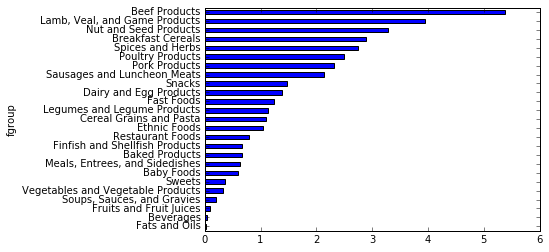

In [38]:
# 根据食物分类和营养类型画出一张中位值图,锌中位值
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)
result['Zinc, Zn'].sort_values().plot(kind='barh')

In [48]:
ndata.fgroup.unique()

array([u'Dairy and Egg Products', u'Spices and Herbs', u'Baby Foods',
       u'Fats and Oils', u'Poultry Products',
       u'Soups, Sauces, and Gravies', u'Sausages and Luncheon Meats',
       u'Breakfast Cereals', u'Fruits and Fruit Juices', u'Pork Products',
       u'Vegetables and Vegetable Products', u'Nut and Seed Products',
       u'Beef Products', u'Beverages', u'Finfish and Shellfish Products',
       u'Legumes and Legume Products', u'Lamb, Veal, and Game Products',
       u'Baked Products', u'Snacks', u'Sweets', u'Cereal Grains and Pasta',
       u'Fast Foods', u'Meals, Entrees, and Sidedishes', u'Ethnic Foods',
       u'Restaurant Foods'], dtype=object)

In [49]:
ndata.nutrient.unique()

array([u'Protein', u'Total lipid (fat)', u'Carbohydrate, by difference',
       u'Ash', u'Energy', u'Water', u'Fiber, total dietary',
       u'Calcium, Ca', u'Iron, Fe', u'Magnesium, Mg', u'Phosphorus, P',
       u'Potassium, K', u'Sodium, Na', u'Zinc, Zn', u'Copper, Cu',
       u'Manganese, Mn', u'Selenium, Se', u'Vitamin A, IU', u'Retinol',
       u'Vitamin A, RAE', u'Vitamin C, total ascorbic acid', u'Thiamin',
       u'Riboflavin', u'Niacin', u'Pantothenic acid', u'Vitamin B-6',
       u'Folate, total', u'Vitamin B-12', u'Folic acid', u'Folate, food',
       u'Folate, DFE', u'Cholesterol', u'Fatty acids, total saturated',
       u'Fatty acids, total monounsaturated',
       u'Fatty acids, total polyunsaturated', u'Tryptophan', u'Threonine',
       u'Isoleucine', u'Leucine', u'Lysine', u'Methionine', u'Cystine',
       u'Phenylalanine', u'Tyrosine', u'Valine', u'Arginine', u'Histidine',
       u'Alanine', u'Aspartic acid', u'Glutamic acid', u'Glycine',
       u'Proline', u'Serine', 

In [56]:
# 营养成分最为丰富的食物是什么
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

get_maximum = lambda x: x.xs(x.value.idxmax())
get_minimum = lambda x: x.xs(x.value.idxmin())

max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]

max_foods

value  \
nutgroup    nutrient                                     
Amino Acids Alanine                              8.009   
            Arginine                             7.436   
            Aspartic acid                       10.203   
            Cystine                              1.307   
            Glutamic acid                       17.452   
            Glycine                             19.049   
            Histidine                            2.999   
            Hydroxyproline                       0.803   
            Isoleucine                           4.300   
            Leucine                              7.200   
            Lysine                               6.690   
            Methionine                           1.859   
            Phenylalanine                        4.600   
            Proline                             12.295   
            Serine                               4.600   
            Threonine                            3.300   
            Tryptophan                           1.600   
            Tyrosine                             3.300   
            Valine                               4.500   
Composition Adjusted Protein                    12.900   
            Carbohydrate, by difference        100.000   
            Fiber, total dietary                79.000   
            Protein                             88.320   
            Sugars, total                       99.800   
            Total lipid (fat)                  100.000   
            Water                              100.000   
Elements    Calcium, Ca                       7364.000   
            Copper, Cu                          15.050   
            Fluoride, F                        584.000   
            Iron, Fe                            87.470   
...                                                ...   
Vitamins    Cryptoxanthin, beta               6186.000   
            Dihydrophylloquinone               103.800   
            Folate, DFE                       2630.000   
            Folate, food                      2340.000   
            Folate, total                     2340.000   
            Folic acid                        1538.000   
            Lutein + zeaxanthin              39550.000   
            Lycopene                         46260.000   
            Menaquinone-4                       33.200   
            Niacin                              97.000   
            Pantothenic acid                    35.000   
            Retinol                          30000.000   
            Riboflavin                          14.300   
            Thiamin                             20.000   
            Tocopherol, beta                     6.490   
            Tocopherol, delta                   30.880   
            Tocopherol, gamma                  100.880   
            Vitamin A, IU                   100000.000   
            Vitamin A, RAE                   30000.000   
            Vitamin B-12                        98.890   
            Vitamin B-12, added                 24.000   
            Vitamin B-6                         12.000   
            Vitamin C, total ascorbic acid    2400.000   
            Vitamin D                        10000.000   
            Vitamin D (D2 + D3)                250.000   
            Vitamin D2 (ergocalciferol)         28.100   
            Vitamin D3 (cholecalciferol)        27.400   
            Vitamin E (alpha-tocopherol)       149.400   
            Vitamin E, added                    46.550   
            Vitamin K (phylloquinone)         1714.500   

                                                                                         food  
nutgroup    nutrient                                                                           
Amino Acids Alanine                                         Gelatins, dry powder, unsweetened  
            Arginine                                             Seeds, sesame flour, low-fat  
          

In [58]:
min_foods = by_nutrient.apply(get_minimum)[['value', 'food']]
min_foods

value  \
nutgroup    nutrient                                
Amino Acids Alanine                          0.00   
            Arginine                         0.00   
            Aspartic acid                    0.00   
            Cystine                          0.00   
            Glutamic acid                    0.00   
            Glycine                          0.00   
            Histidine                        0.00   
            Hydroxyproline                   0.00   
            Isoleucine                       0.00   
            Leucine                          0.00   
            Lysine                           0.00   
            Methionine                       0.00   
            Phenylalanine                    0.00   
            Proline                          0.00   
            Serine                           0.00   
            Threonine                        0.00   
            Tryptophan                       0.00   
            Tyrosine                         0.00   
            Valine                           0.00   
Composition Adjusted Protein                 2.18   
            Carbohydrate, by difference      0.00   
            Fiber, total dietary             0.00   
            Protein                          0.00   
            Sugars, total                    0.00   
            Total lipid (fat)                0.00   
            Water                            0.00   
Elements    Calcium, Ca                      0.00   
            Copper, Cu                       0.00   
            Fluoride, F                      0.00   
            Iron, Fe                         0.00   
...                                           ...   
Vitamins    Cryptoxanthin, beta              0.00   
            Dihydrophylloquinone             0.00   
            Folate, DFE                      0.00   
            Folate, food                     0.00   
            Folate, total                    0.00   
            Folic acid                       0.00   
            Lutein + zeaxanthin              0.00   
            Lycopene                         0.00   
            Menaquinone-4                    0.00   
            Niacin                           0.00   
            Pantothenic acid                 0.00   
            Retinol                          0.00   
            Riboflavin                       0.00   
            Thiamin                          0.00   
            Tocopherol, beta                 0.00   
            Tocopherol, delta                0.00   
            Tocopherol, gamma                0.00   
            Vitamin A, IU                    0.00   
            Vitamin A, RAE                   0.00   
            Vitamin B-12                     0.00   
            Vitamin B-12, added              0.00   
            Vitamin B-6                      0.00   
            Vitamin C, total ascorbic acid   0.00   
            Vitamin D                        0.00   
            Vitamin D (D2 + D3)              0.00   
            Vitamin D2 (ergocalciferol)      0.10   
            Vitamin D3 (cholecalciferol)     0.00   
            Vitamin E (alpha-tocopherol)     0.00   
            Vitamin E, added                 0.00   
            Vitamin K (phylloquinone)        0.00   

                                                                                         food  
nutgroup    nutrient                                                                           
Amino Acids Alanine                                                            Vinegar, cider  
            Arginine                                                           Vinegar, cider  
            Aspartic acid                                                      Vinegar, cider  
            Cystine                                                            Vinegar, cider  
            Glutamic acid                                                      Vinegar, cider  
            Glycine             

In [55]:
# 取food前50个
max_foods.food = max_foods.food.str[:50]
max_foods.ix['Amino Acids']['food']

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 